8.7 


In [43]:
import pandas as pd
import numpy as np
import math
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt


In [148]:
filename = 'GMC_3.txt'
df = pd.read_csv(filename, delimiter= ',', names=["event_num", "num_part", "eps2", "eps3", "psi2", "psi3", "impact_parameter", "-L", "+L", "collisionN_output", "start_x", "start_y", "angle_output"])

df

,event_num,num_part,eps2,eps3,psi2,psi3,impact_parameter,-L,+L,collisionN_output,start_x,start_y,angle_output
0,0.0,197.0,0.148354,0.313345,0.226153,0.291103,7.590116,43.0,3.0,6.0,-1.29,3.86,129.0
1,1.0,62.0,0.674955,0.259319,0.875348,0.496713,11.028033,6.0,16.0,5.0,-1.27,-0.62,28.0
2,2.0,198.0,0.403234,0.211289,3.110452,0.517661,7.285278,29.0,20.0,8.0,1.37,2.27,112.0
3,3.0,243.0,0.284537,0.131008,2.884804,1.036682,6.503619,33.0,21.0,8.0,1.86,1.72,81.0
4,4.0,238.0,0.324759,0.228707,2.599611,1.950773,6.930191,43.0,2.0,1.0,1.98,5.66,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74995.0,13.0,0.869305,0.253857,0.226501,0.023989,13.492567,3.0,4.0,3.0,-0.45,-0.27,62.0
74996,74996.0,12.0,0.784364,0.436292,0.334038,1.401986,13.891232,3.0,4.0,2.0,-0.29,1.51,68.0
74997,74997.0,85.0,0.368273,0.378108,2.949892,0.322345,10.350510,30.0,1.0,1.0,0.52,4.10,70.0
74998,74998.0,320.0,0.169248,0.094100,0.250384,1.378218,4.287032,16.0,43.0,15.0,-1.20,-2.23,37.0


In [149]:
num_intersect_minus, num_intersect_plus = [], []

num_intersect_minus = df['-L'].tolist()

num_intersect_plus = df['+L'].tolist()

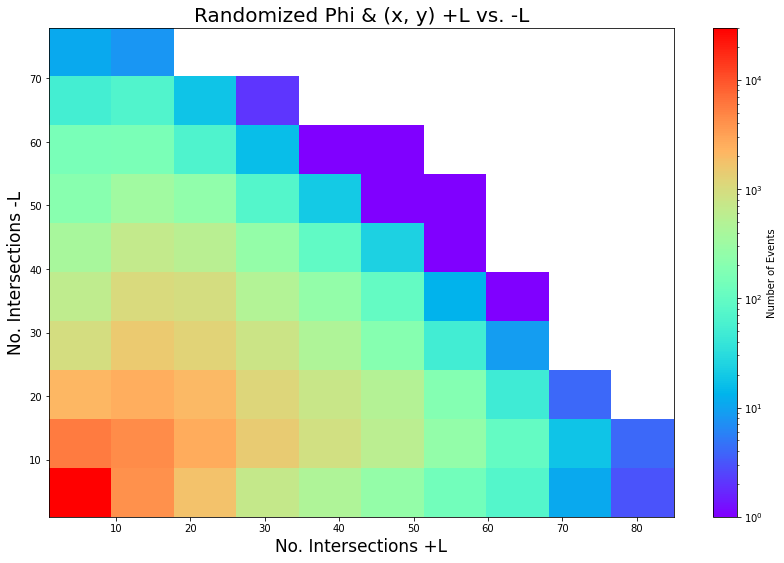

In [150]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(14, 9))


plt.hist2d(num_intersect_plus, num_intersect_minus, norm=LogNorm(), cmap = plt.cm.rainbow, bins=10)


# plt.hist2d(num_intersect_minus, num_intersect_plus, bins=50)
plt.title('Randomized Phi & (x, y) +L vs. -L', size=20)
# plt.xlim(0, 40)
# plt.ylim(0, 40)
plt.xlabel('No. Intersections +L',size=17)
plt.ylabel('No. Intersections -L', size=17)
plt.colorbar(label='Number of Events')
plt.show()

Npart > 350

In [151]:
filtered_350 = df[df['num_part'] > 350]

filtered_350

,event_num,num_part,eps2,eps3,psi2,psi3,impact_parameter,-L,+L,collisionN_output,start_x,start_y,angle_output
16,16.0,366.0,0.071964,0.091618,2.330339,0.233979,3.376023,15.0,53.0,8.0,2.12,-1.48,160.0
28,28.0,394.0,0.074447,0.114396,1.107897,1.735785,2.152406,37.0,9.0,4.0,-3.93,-2.38,162.0
80,80.0,378.0,0.123087,0.138517,2.273798,1.885746,2.835870,37.0,14.0,12.0,-4.22,0.12,114.0
96,96.0,392.0,0.028100,0.035590,1.774242,0.069981,2.545684,44.0,5.0,5.0,4.74,2.85,44.0
98,98.0,377.0,0.125348,0.061273,2.957105,0.146296,2.670546,59.0,15.0,9.0,-3.65,-0.31,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74924,74924.0,361.0,0.103446,0.196996,0.050656,1.142746,3.575137,30.0,38.0,15.0,1.00,-0.45,128.0
74930,74930.0,398.0,0.057351,0.104499,0.236247,2.005125,2.194159,28.0,16.0,8.0,-4.34,0.71,94.0
74941,74941.0,355.0,0.125130,0.091737,0.486266,1.198867,3.534960,20.0,36.0,14.0,-3.55,1.94,49.0
74948,74948.0,389.0,0.055132,0.137909,0.855082,1.268438,2.278831,38.0,7.0,8.0,2.73,4.83,117.0


In [152]:
minus_L, plus_L = [], []

minus_L = filtered_350['-L'].tolist()

plus_L = filtered_350['+L'].tolist()


# plus_L

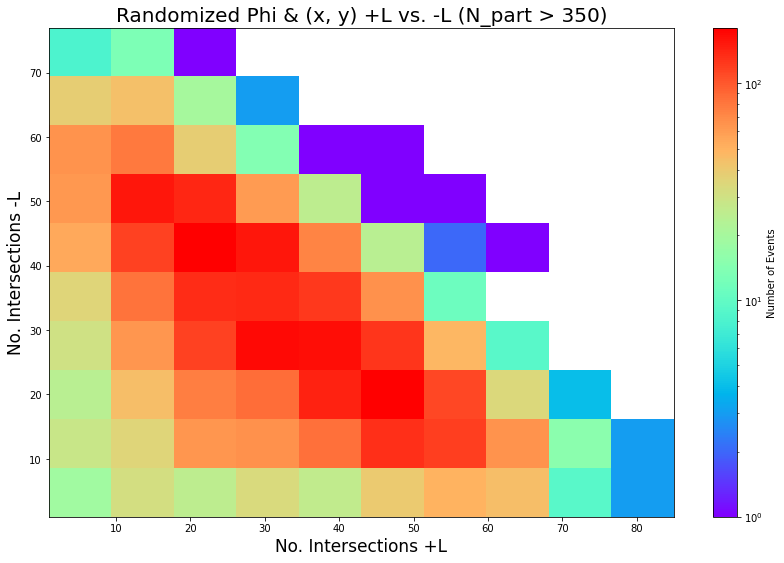

In [153]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(14, 9))


plt.hist2d(plus_L, minus_L, norm=LogNorm(), cmap = plt.cm.rainbow, bins=10)

# plt.xlim(0, 70)
# plt.ylim(0, 70)

plt.title('Randomized Phi & (x, y) +L vs. -L (N_part > 350)', size=20)
plt.xlabel('No. Intersections +L',size=17)
plt.ylabel('No. Intersections -L', size=17)
plt.colorbar(label='Number of Events')
plt.show()

Npart < 50

In [154]:
filtered_50 = df[df['num_part'] < 50]

filtered_50

,event_num,num_part,eps2,eps3,psi2,psi3,impact_parameter,-L,+L,collisionN_output,start_x,start_y,angle_output
5,5.0,43.0,0.672413,0.216749,0.468721,1.412427,11.225863,6.0,10.0,5.000000,1.20,-0.69000,157.0
8,8.0,2.0,1.000000,0.000000,2.306076,1.642335,16.802591,1.0,1.0,2.306076,2.00,1.00000,117.0
10,10.0,2.0,1.000000,0.000000,0.953486,1.938907,15.112532,1.0,1.0,0.953486,2.00,1.00000,165.0
12,12.0,18.0,0.771953,0.602744,0.193333,0.634273,12.903193,2.0,1.0,1.000000,1.06,2.82000,52.0
13,13.0,9.0,0.195237,0.163103,0.063587,0.673629,14.481514,7.0,7.0,1.000000,-1.83,2.31000,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74989,74989.0,41.0,0.425384,0.327499,2.930299,0.777467,11.980275,3.0,12.0,6.000000,0.59,-2.62000,74.0
74992,74992.0,25.0,0.661890,0.163212,2.697633,1.416867,13.108095,1.0,1.0,2.697633,25.00,0.66189,104.0
74993,74993.0,16.0,0.866198,0.661804,2.771167,1.303362,14.226542,7.0,3.0,1.000000,2.26,2.07000,2.0
74995,74995.0,13.0,0.869305,0.253857,0.226501,0.023989,13.492567,3.0,4.0,3.000000,-0.45,-0.27000,62.0


In [155]:
num_intersect_minus, num_intersect_plus = [], []


num_intersect_minus = filtered_50['-L'].tolist()

num_intersect_plus = filtered_50['+L'].tolist()

# num_intersect_minus

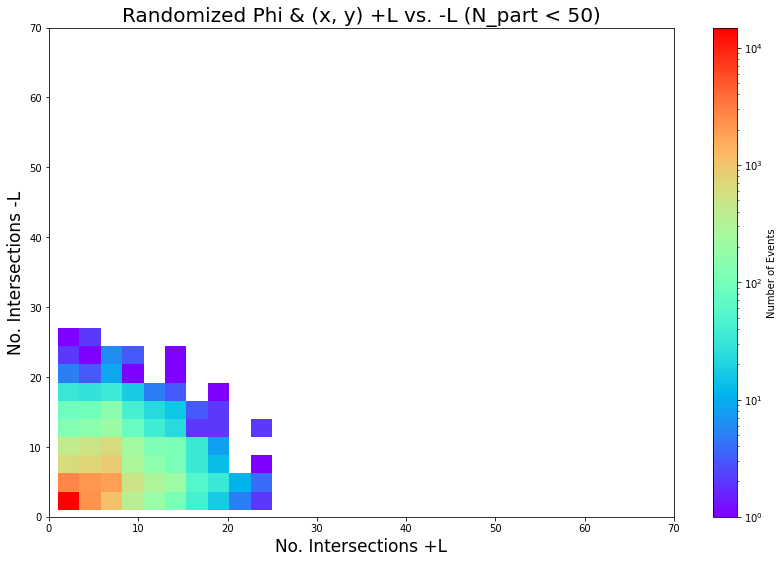

In [156]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(14, 9))


plt.hist2d(num_intersect_plus,num_intersect_minus, norm=LogNorm(), cmap = plt.cm.rainbow, bins=10)

plt.xlim(0, 70)
plt.ylim(0, 70)

plt.title('Randomized Phi & (x, y) +L vs. -L (N_part < 50)', size=20)
plt.xlabel('No. Intersections +L',size=17)
plt.ylabel('No. Intersections -L', size=17)
plt.colorbar(label='Number of Events')
plt.show()